In [1]:
import numpy as np
from numpy import fft
from itertools import chain, zip_longest
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # higher res notebook output

The block below sets up wavenumbers `k`, the Laplacian in Fourier space `L`, and the data that I will apply the filter to `f0`. 

The data is constructed so that the DFT of the data is 1 for all wavenumbers. Once we've applied the filter, if we compute and plot the absolute value of the FFT of `f` then what we see is the effective filter shape.

In [2]:
%matplotlib inline
k = np.concatenate([np.arange(0,129), np.arange(-127,0)])
L = - k**2
fHat = np.exp(1j*np.random.uniform(0,2*np.pi,256))
f0 = fft.ifft(fHat)
n_steps = 128
fftshift = np.argsort(k)

In [3]:
fIncreasing = np.zeros((256,128))
fDecreasing = np.zeros((256,128))
fAlternating= np.zeros((256,128))

# First compute the stages arranged from most-amplifying to most-damping
s = (np.arange(43,n_steps+43))**2
for j in range(n_steps):
    f = f0
    for i in range(j):
        fHat = fft.fft(f)
        f = fft.ifft(fHat + (1/s[i])*L*fHat)
    fIncreasing[:,j] = np.abs(fft.fft(f))[fftshift]
    
# Next compute the stages arranged from most-amplifying to most-damping
s = -np.sort(-(np.arange(43,n_steps+43))**2)
for j in range(n_steps):
    f = f0
    for i in range(j):
        fHat = fft.fft(f)
        f = fft.ifft(fHat + (1/s[i])*L*fHat)
    fDecreasing[:,j] = np.abs(fft.fft(f))[fftshift]

# Next plot the stages alternating most-amplifying to most-damping
ind = np.argsort(np.abs(1 - 128**2/s))
s = s[ind] # sorted from most damping to most amplifying
indD = np.argwhere(np.abs(1 - 128**2/s)<=1)
indA = np.argwhere(np.abs(1 - 128**2/s)>1)
sD = s[indD].tolist() # Damping roots, sorted most to least damping
sA = np.flip(s[indA]).tolist() # Amplifying roots, sorted most to least amplifying
s = [x for x in chain(*zip_longest(sD,sA)) if x is not None]
s = np.array([y for x in s for y in x])
for j in range(n_steps):
    f = f0
    for i in range(j):
        fHat = fft.fft(f)
        f = fft.ifft(fHat + (1/s[i])*L*fHat)
    fAlternating[:,j] = np.abs(fft.fft(f))[fftshift]

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


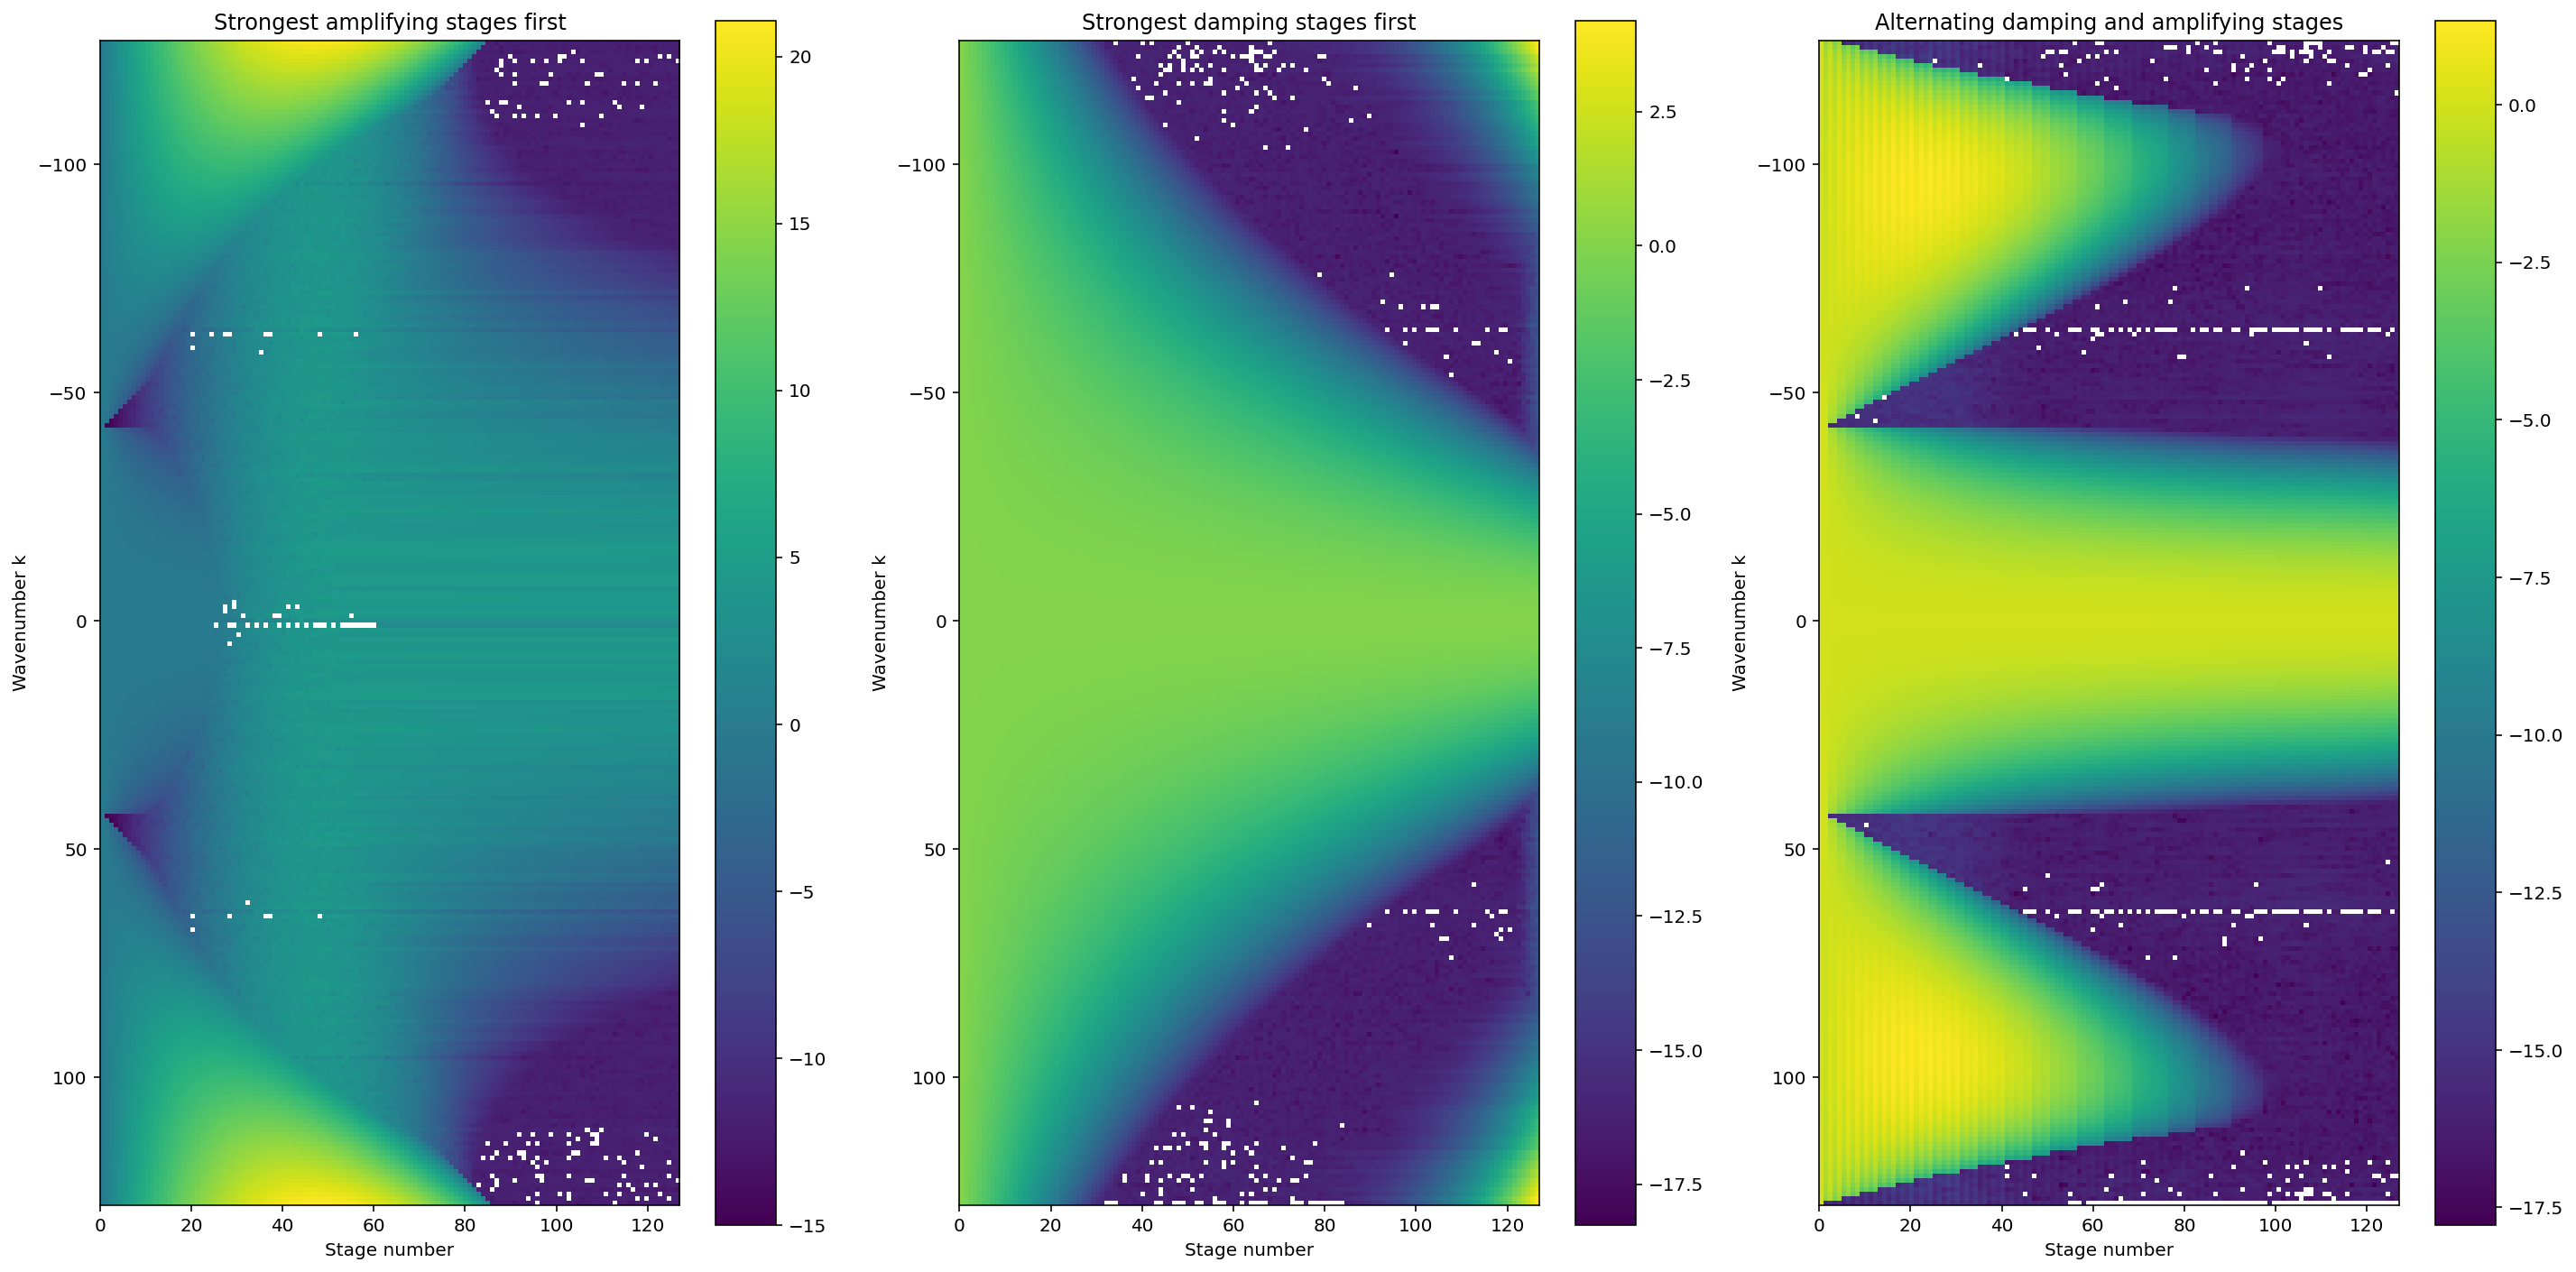

In [4]:
fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=[20,10])

im0 = axarr[0].imshow(np.log10(fIncreasing), extent=[0,127,128,-127])
axarr[0].set_xlabel('Stage number')
axarr[0].set_ylabel('Wavenumber k')
axarr[0].set_title('Strongest amplifying stages first')
fig.colorbar(im0,ax=axarr[0])
im1 = axarr[1].imshow(np.log10(fDecreasing), extent=[0,127,128,-127])
axarr[1].set_xlabel('Stage number')
axarr[1].set_ylabel('Wavenumber k')
axarr[1].set_title('Strongest damping stages first')
fig.colorbar(im1,ax=axarr[1])
im2 = axarr[2].imshow(np.log10(fAlternating), extent=[0,127,128,-127])
axarr[2].set_xlabel('Stage number')
axarr[2].set_ylabel('Wavenumber k')
axarr[2].set_title('Alternating damping and amplifying stages')
fig.colorbar(im2,ax=axarr[2])

plt.tight_layout()

## Same colorbar for all 3 plots (on logarithmic scale, cut at 10^4)

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  # This is added back by InteractiveShellApp.init_path()
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  # This is added back by InteractiveShellApp.init_path()
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  app.launch_new_instance

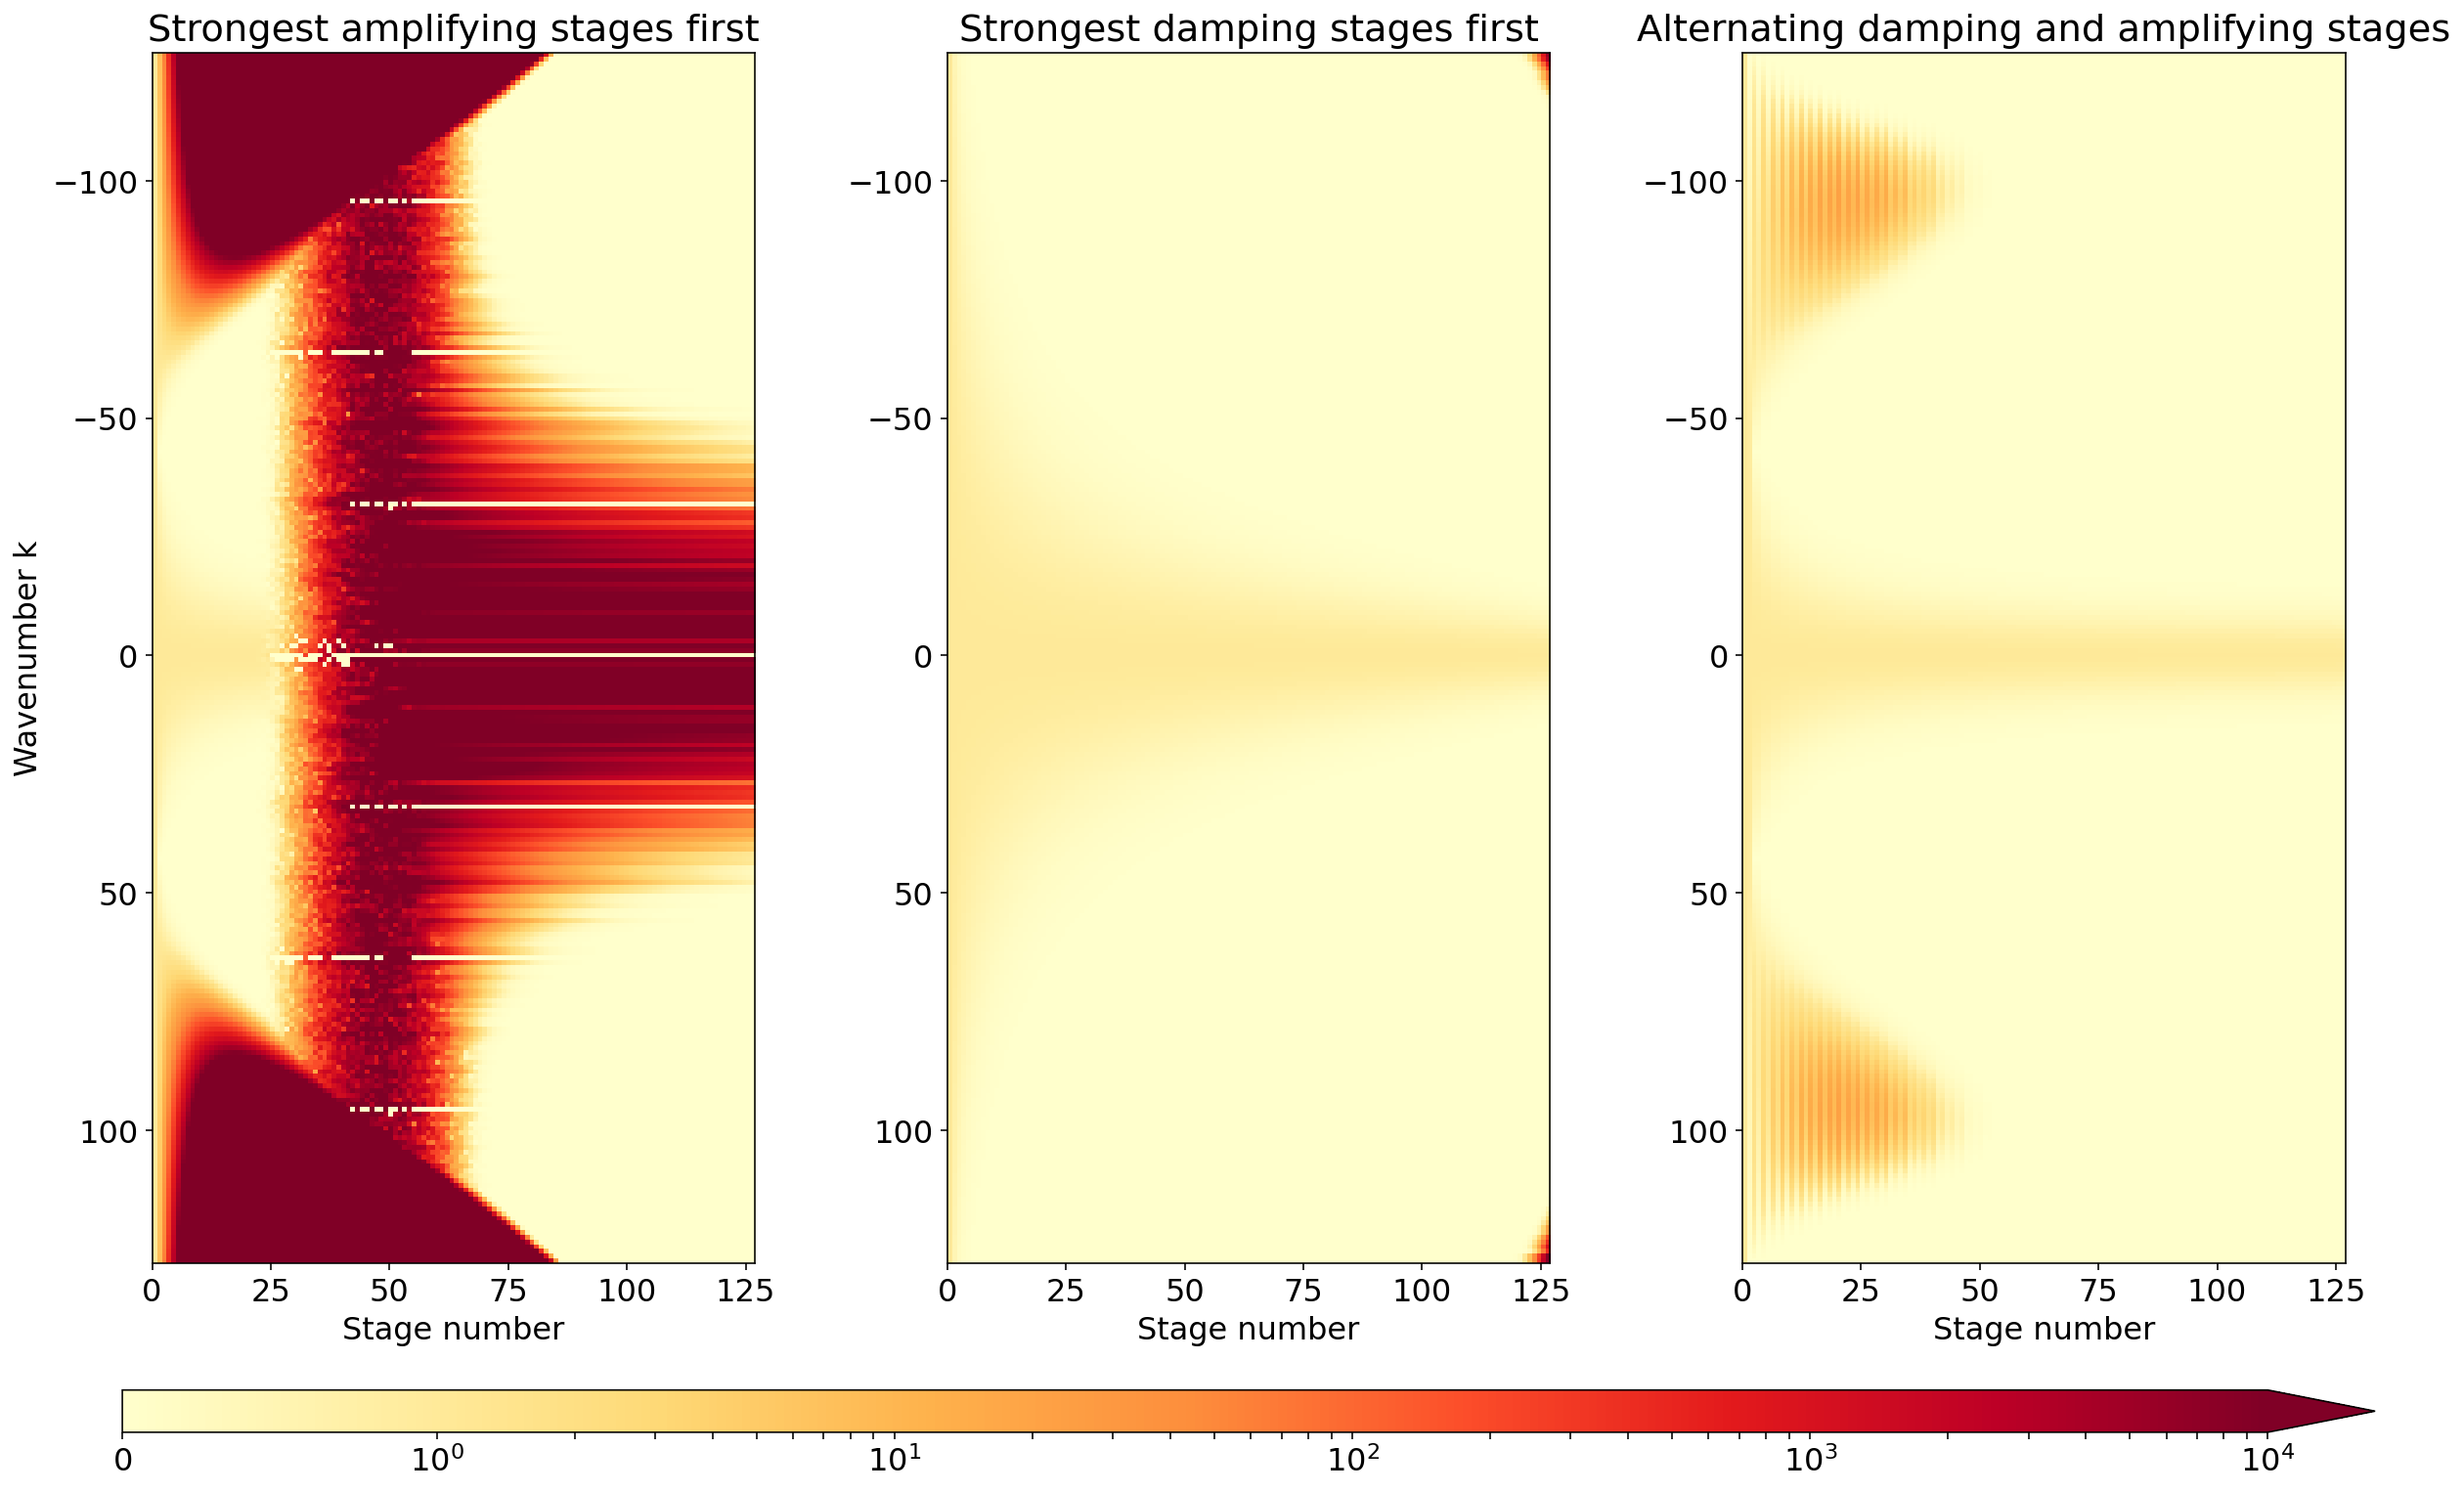

In [11]:
import matplotlib.pylab as pylab
import matplotlib as mpl
params = {'font.size': 16}
pylab.rcParams.update(params)
cmap = 'YlOrRd'
#cmap = 'hot'
vmax = 1e4

fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=[20,10])

im0 = axarr[0].imshow(fIncreasing, extent=[0,127,128,-127], cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[0].set_xlabel('Stage number')
axarr[0].set_ylabel('Wavenumber k')
axarr[0].set_title('Strongest amplifying stages first')

im1 = axarr[1].imshow(fDecreasing, extent=[0,127,128,-127], cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[1].set_xlabel('Stage number')
#axarr[1].set_ylabel('Wavenumber k')
axarr[1].set_title('Strongest damping stages first')

im2 = axarr[2].imshow(fAlternating, extent=[0,127,128,-127], cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[2].set_xlabel('Stage number')
#axarr[2].set_ylabel('Wavenumber k')
axarr[2].set_title('Alternating damping and amplifying stages')

# colorbar
fig.subplots_adjust(left=0.1, bottom=0.02)
cax = fig.add_axes([0.1, -0.1, 0.8, 0.03])
cbar = fig.colorbar(im0, cax=cax, orientation='horizontal',extend='max')

#plt.savefig('figures/instability.png',dpi=400,bbox_inches='tight',pad_inches=0)

## Different colorbar for each plot with same linear colormap, but with different max

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  # This is added back by InteractiveShellApp.init_path()
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  # This is added back by InteractiveShellApp.init_path()
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
/glade/u/apps/dav/opt/pyt

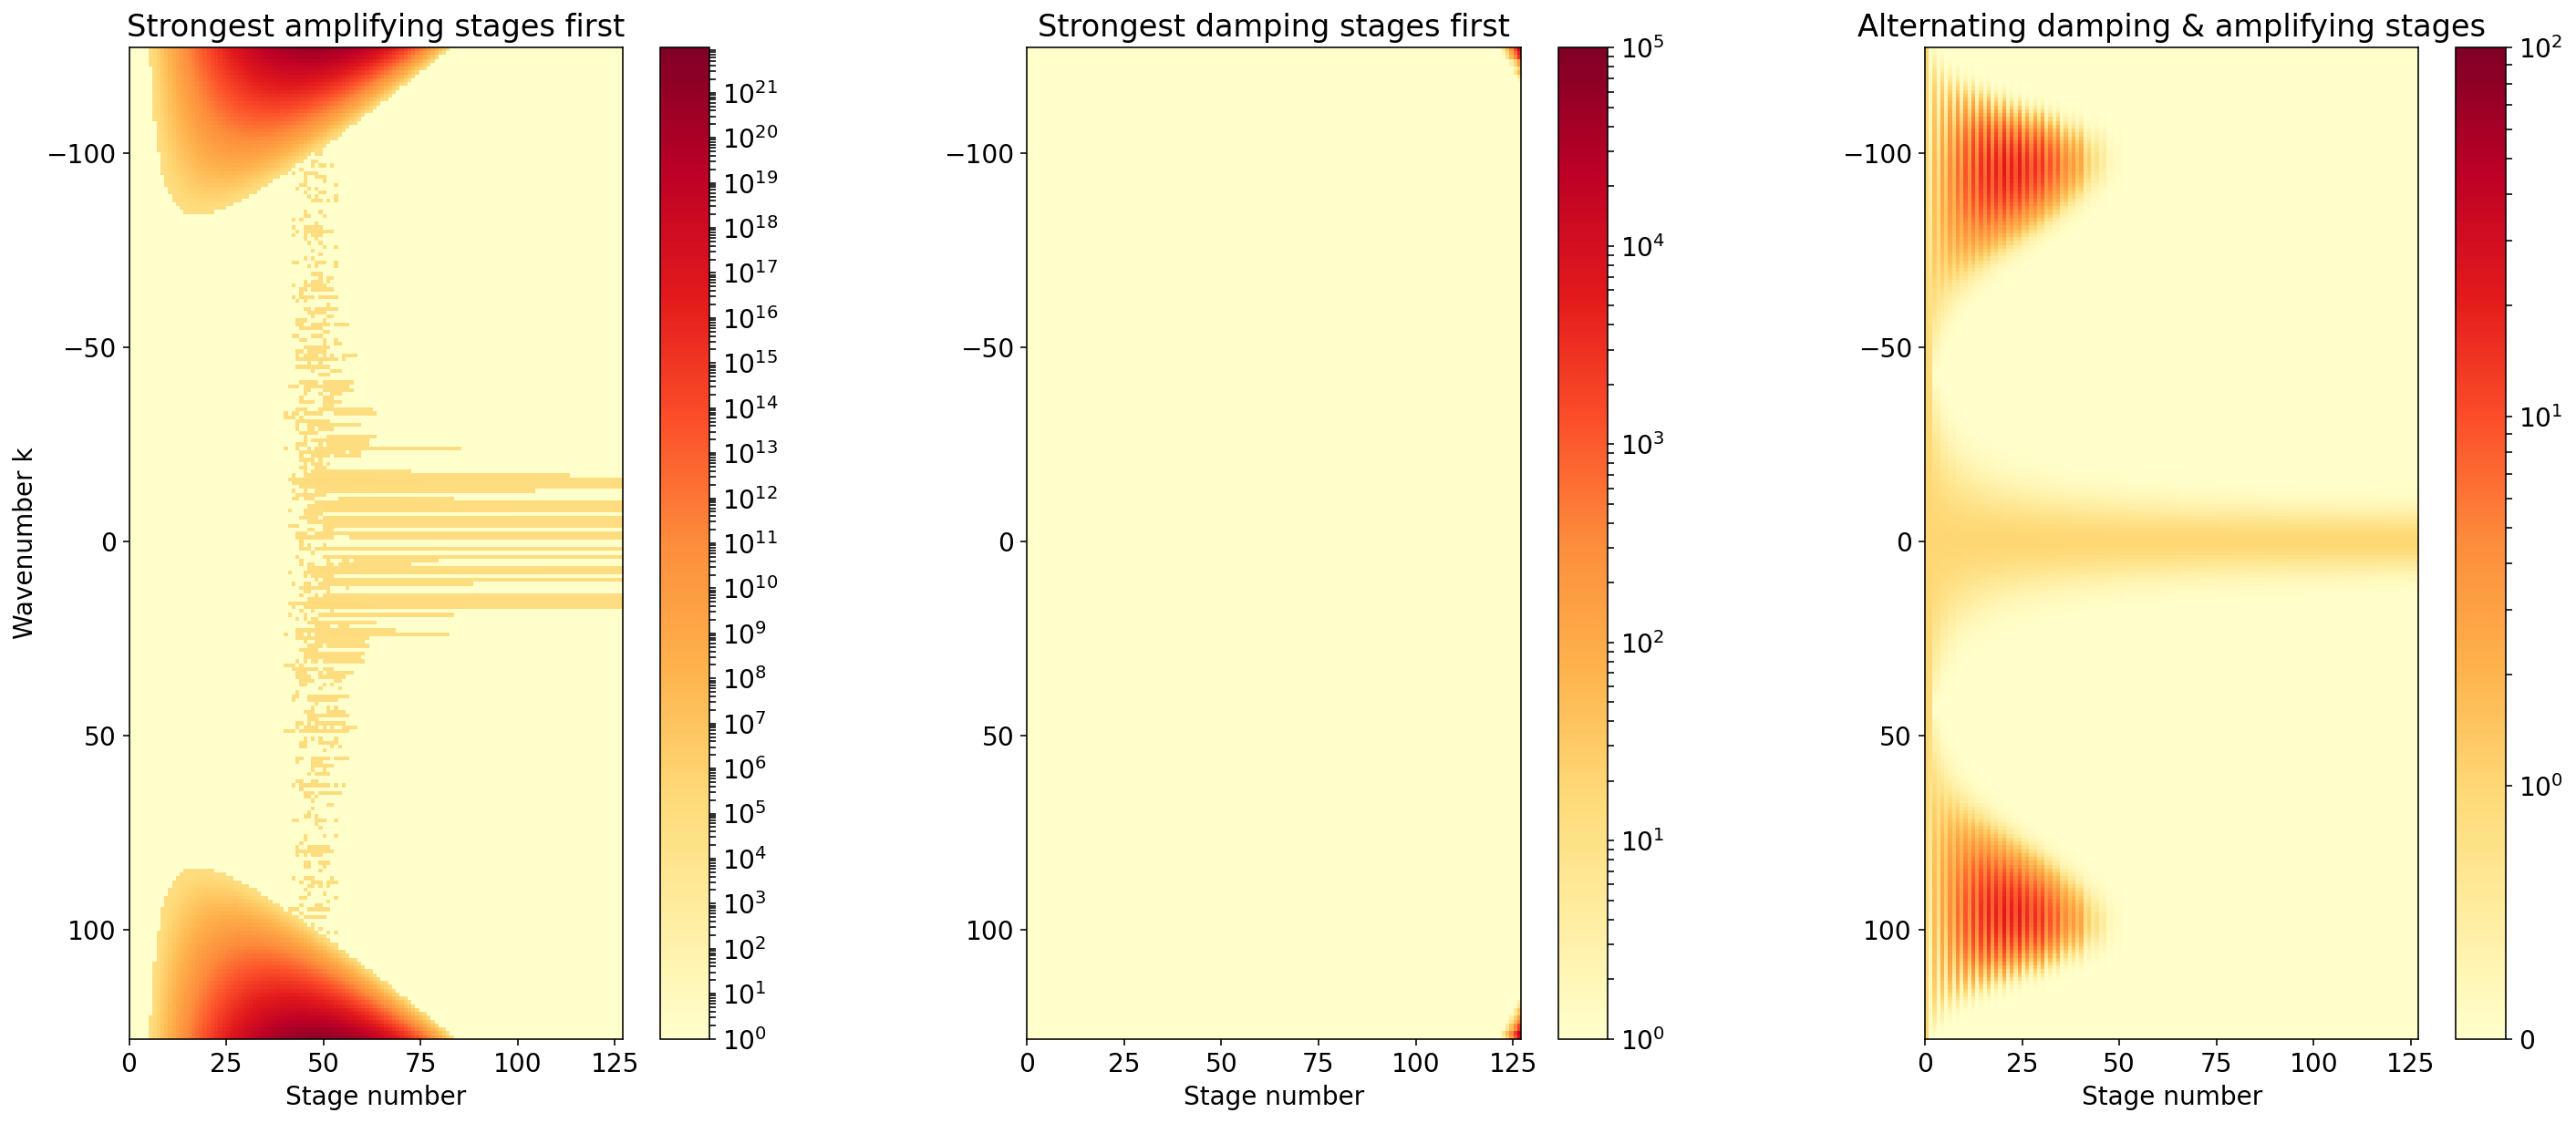

In [5]:
import matplotlib as mpl
import matplotlib.pylab as pylab
params = {'font.size': 14}
pylab.rcParams.update(params)
cmap = 'YlOrRd'

fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=[25,10])

vmax = 1e22
vmin = 1
im0 = axarr[0].imshow(fIncreasing, extent=[0,127,128,-127], cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax, vmin=vmin)
axarr[0].set_xlabel('Stage number')
axarr[0].set_ylabel('Wavenumber k')
axarr[0].set_title('Strongest amplifying stages first')
fig.colorbar(im0,ax=axarr[0])

vmax = 1e5
vmin = 1
im1 = axarr[1].imshow(fDecreasing, extent=[0,127,128,-127], cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax, vmin=vmin)
axarr[1].set_xlabel('Stage number')
#axarr[1].set_ylabel('Wavenumber k')
axarr[1].set_title('Strongest damping stages first')
fig.colorbar(im1,ax=axarr[1])

vmax = 100
#vmax = 22
im2 = axarr[2].imshow(fAlternating, extent=[0,127,128,-127], cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[2].set_xlabel('Stage number')
#axarr[2].set_ylabel('Wavenumber k')
axarr[2].set_title('Alternating damping & amplifying stages')
fig.colorbar(im2,ax=axarr[2])


#plt.savefig('figures/instability.png',dpi=400,bbox_inches='tight',pad_inches=0)

Next: Same plot but third panel on linear scale, rather than on logarithmic

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  # Remove the CWD from sys.path while we load stuff.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  # Remove the CWD from sys.path while we load stuff.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
/glade/u/apps/dav/opt/python/3.7.

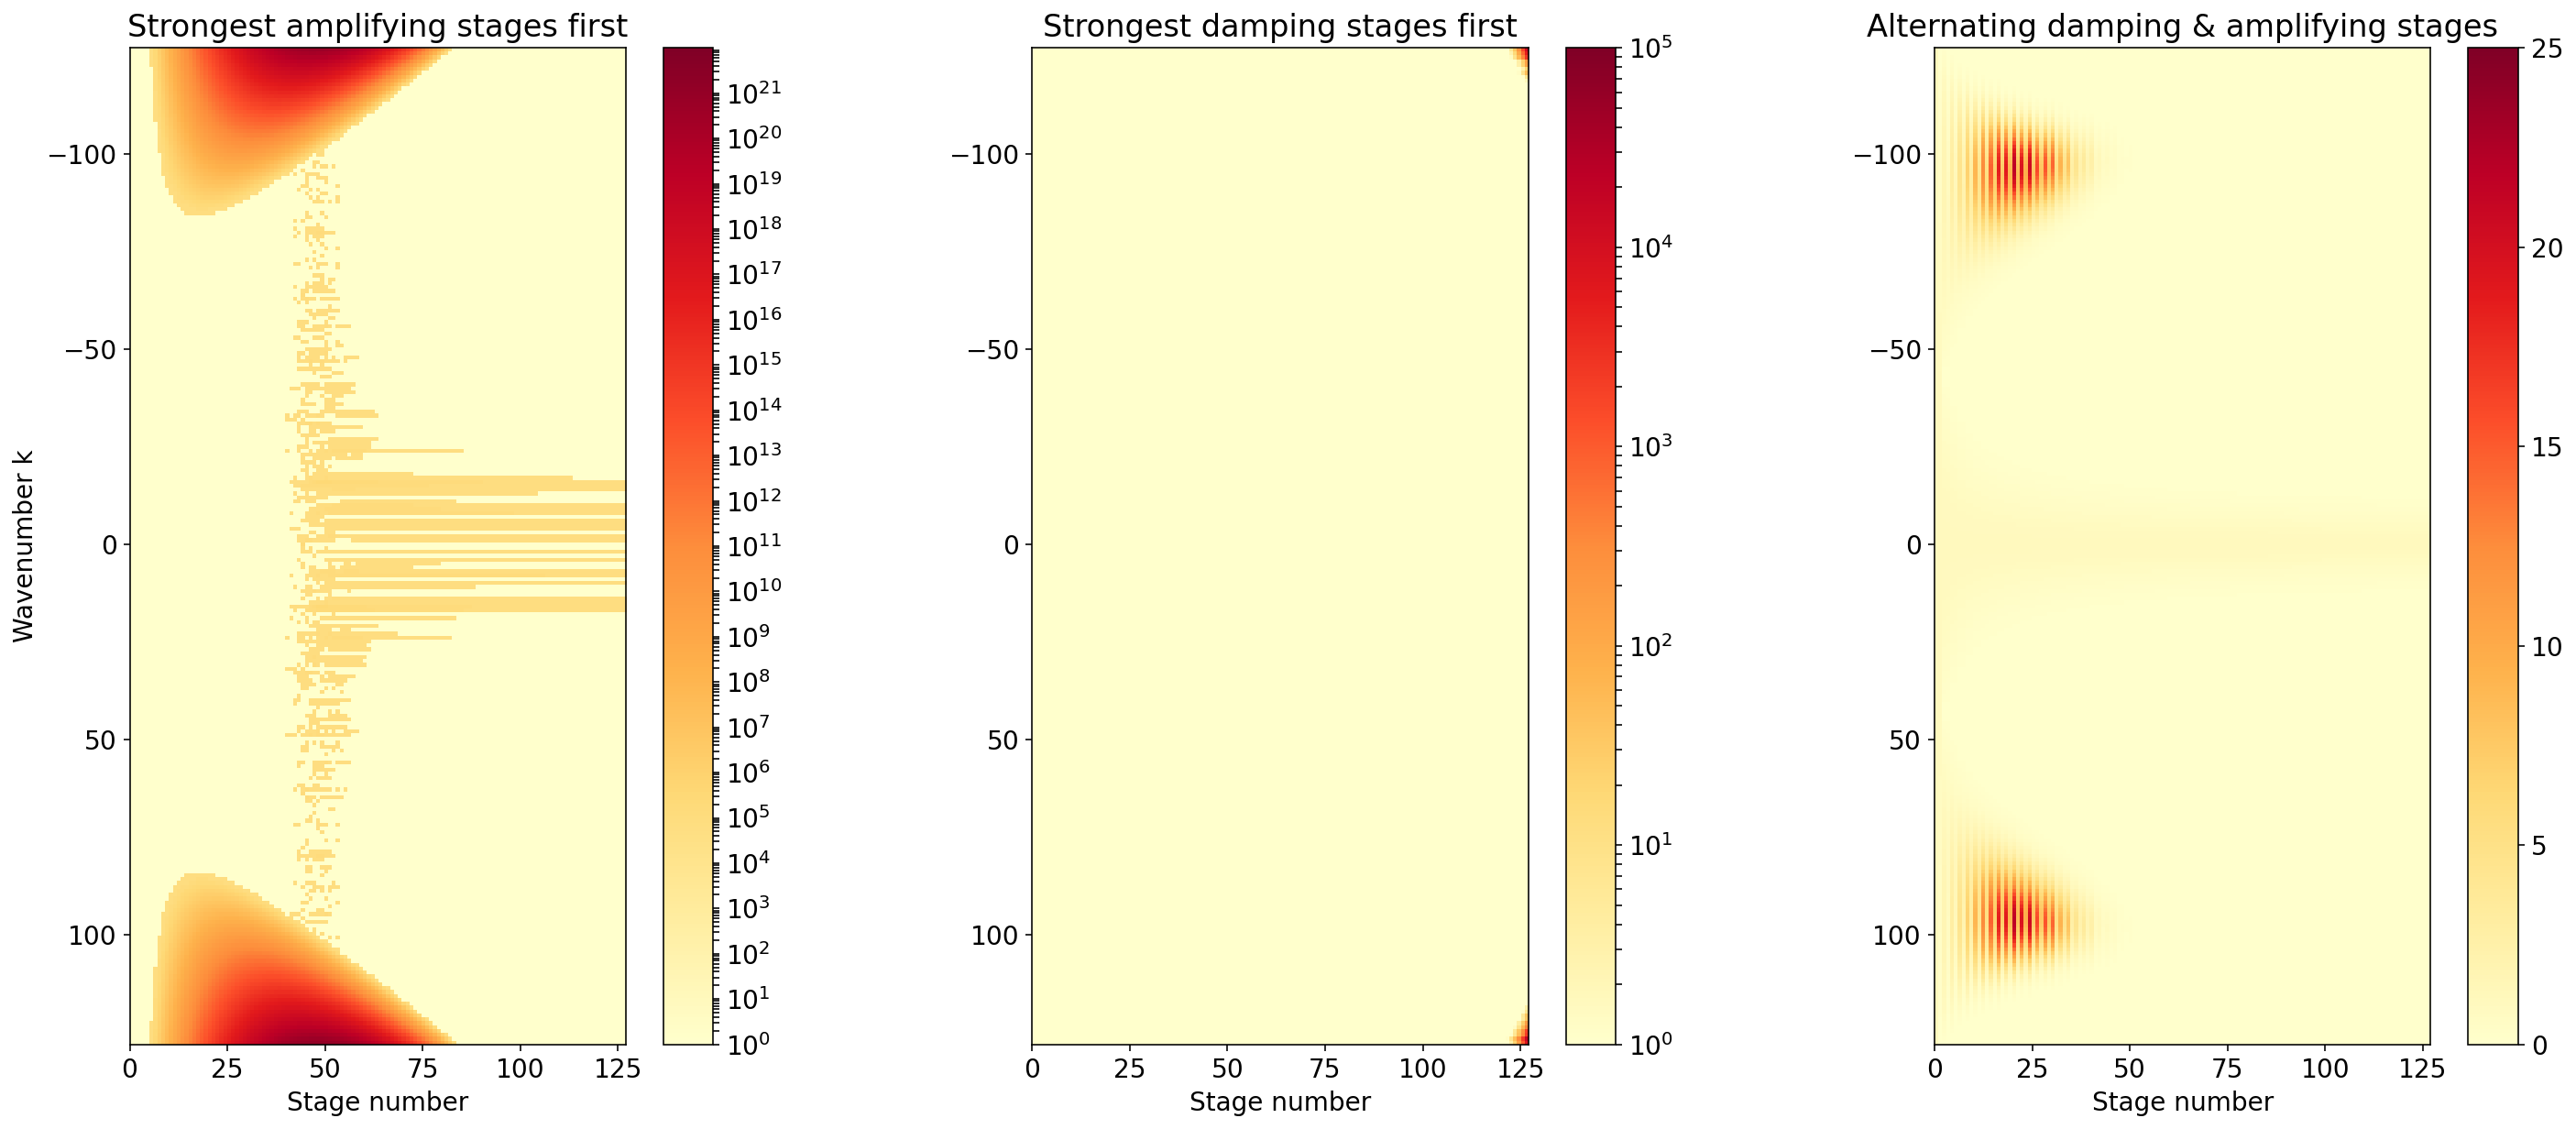

In [6]:
import matplotlib.pylab as pylab
params = {'font.size': 14}
pylab.rcParams.update(params)
cmap = 'YlOrRd'

fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=[25,10])

vmax = 1e22
vmin = 1
im0 = axarr[0].imshow(fIncreasing, extent=[0,127,128,-127], cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax, vmin=vmin)
axarr[0].set_xlabel('Stage number')
axarr[0].set_ylabel('Wavenumber k')
axarr[0].set_title('Strongest amplifying stages first')
fig.colorbar(im0,ax=axarr[0])

vmax = 1e5
vmin = 1
im1 = axarr[1].imshow(fDecreasing, extent=[0,127,128,-127], cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax, vmin=vmin)
axarr[1].set_xlabel('Stage number')
#axarr[1].set_ylabel('Wavenumber k')
axarr[1].set_title('Strongest damping stages first')
fig.colorbar(im1,ax=axarr[1])

vmax = 25
im2 = axarr[2].imshow(fAlternating, extent=[0,127,128,-127], cmap=cmap , vmax=vmax)
axarr[2].set_xlabel('Stage number')
#axarr[2].set_ylabel('Wavenumber k')
axarr[2].set_title('Alternating damping & amplifying stages')
fig.colorbar(im2,ax=axarr[2])


#plt.savefig('figures/instability.png',dpi=400,bbox_inches='tight',pad_inches=0)

The second plot is not super informative, so let's try to experiment a little bit with nonlinear colormaps in the following.

## Different colorbar for each plot, with engineered colormaps

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecation

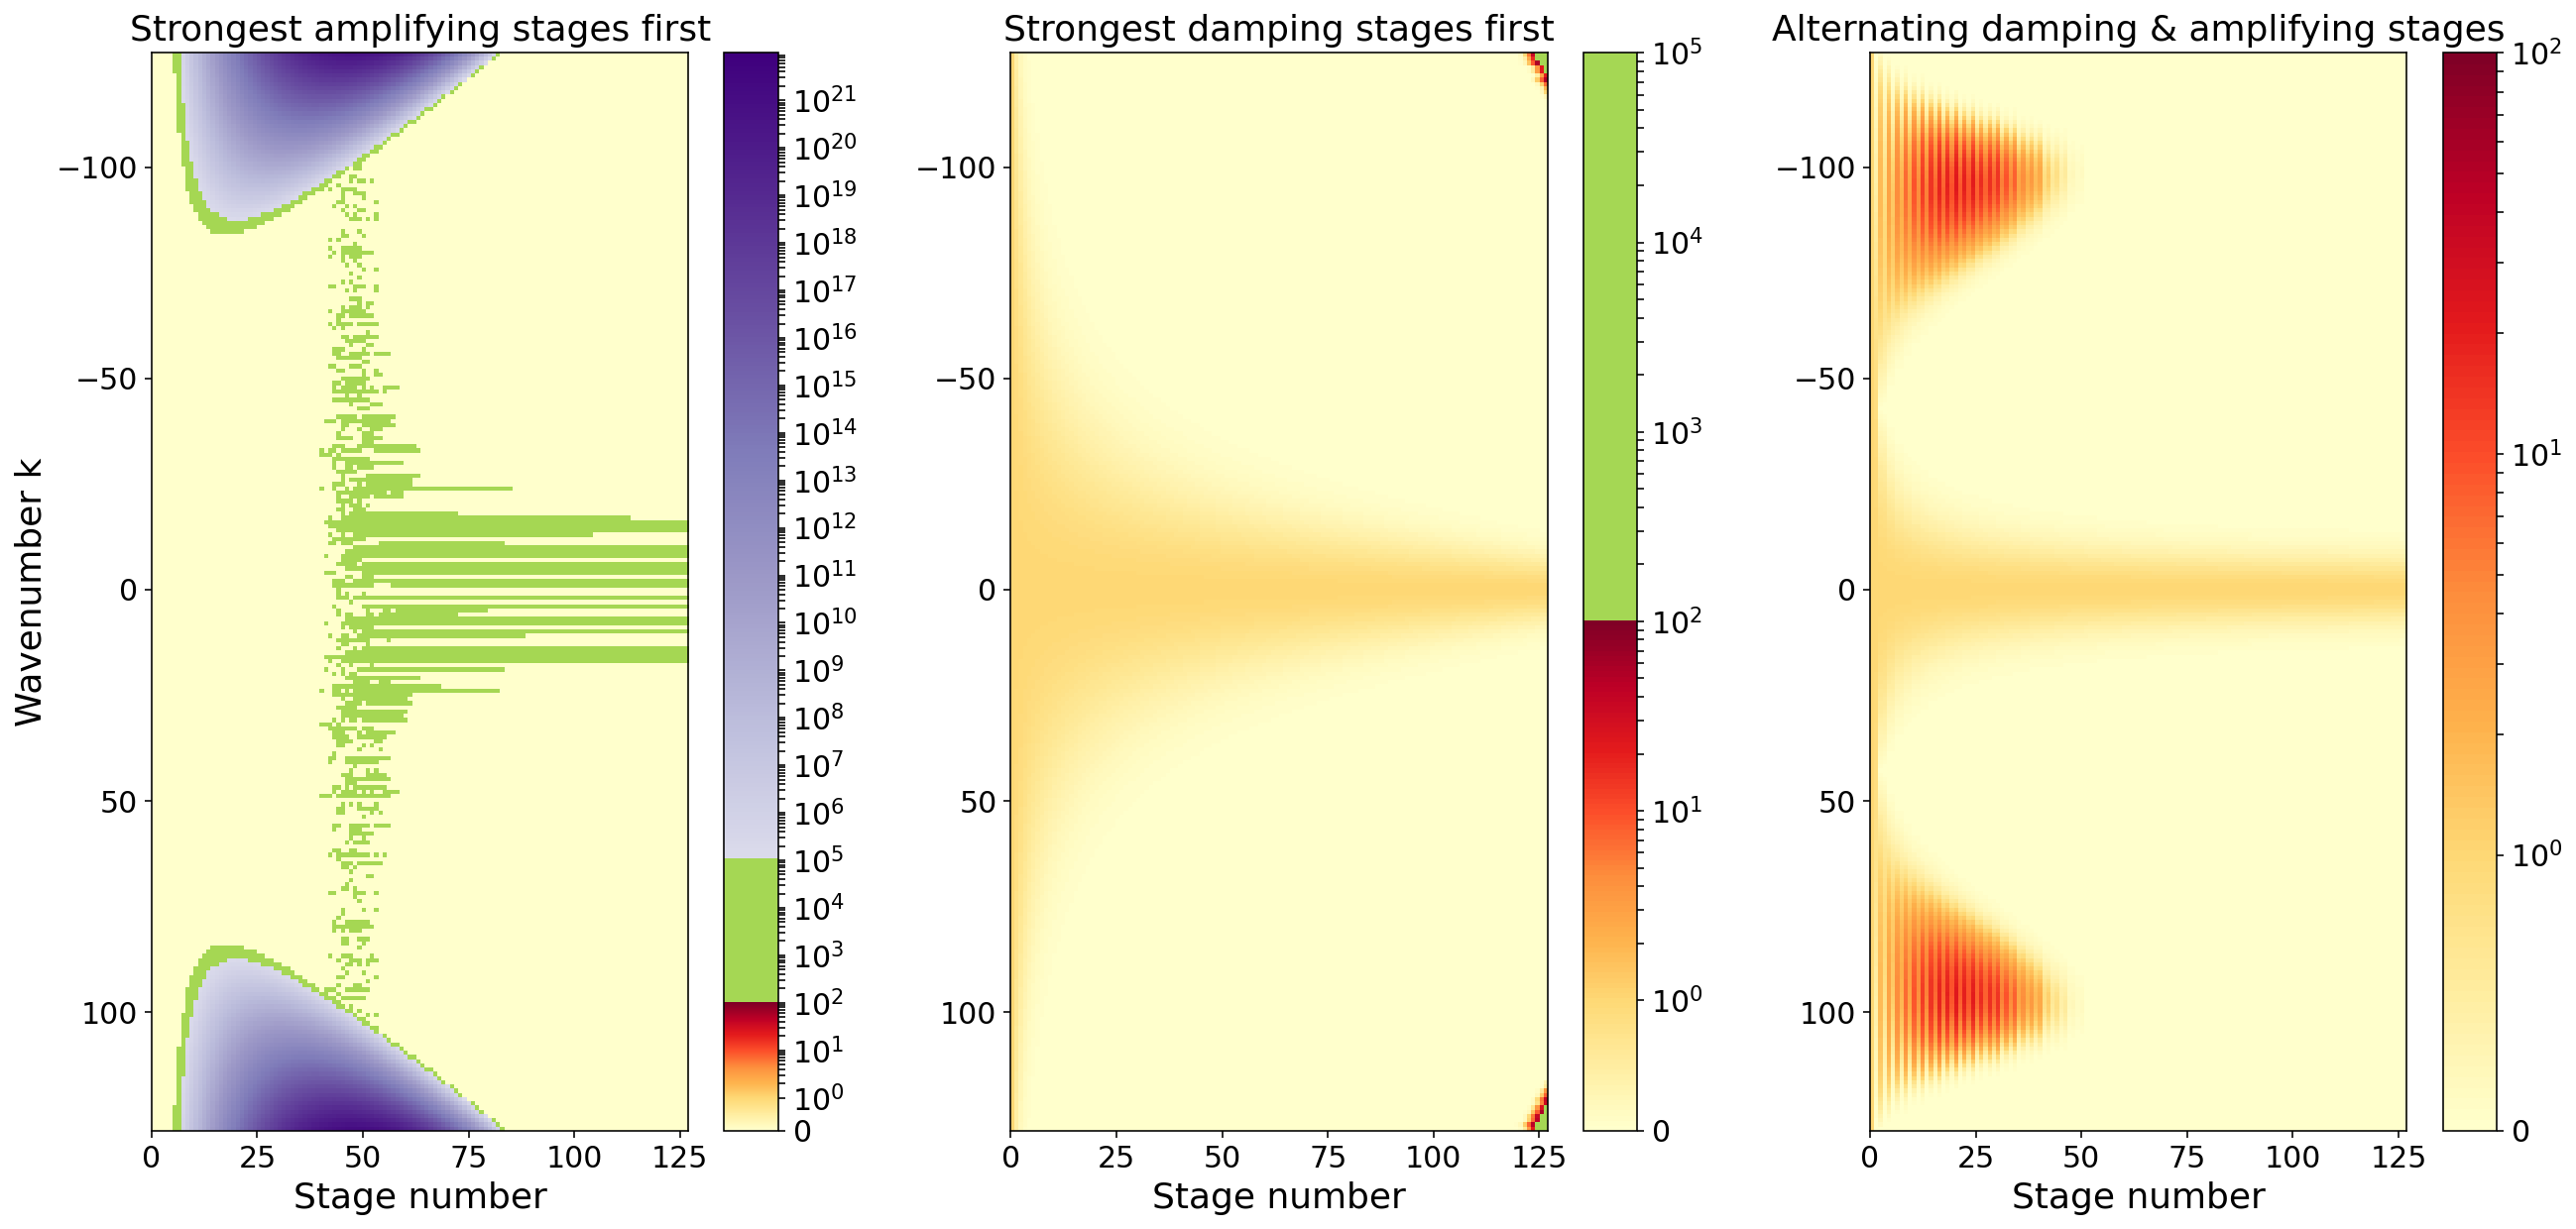

In [7]:
import matplotlib as mpl
import matplotlib.pylab as pylab
params = {'font.size': 15 }
pylab.rcParams.update(params)
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#cmap = 'YlOrRd'





fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=[22,10])

# first color map
YlOrRd = cm.get_cmap('YlOrRd', 256)
newcolors = YlOrRd(np.linspace(0, 1, 1111))
YlOrRd = YlOrRd(np.linspace(0, 1, 133))

Purples = cm.get_cmap('Purples', 256)
Purples = Purples(np.linspace(0, 1, 1100))
Purples = Purples[-830:]

green = np.array([166/256, 216/256, 84/256, 1])
newcolors[:-978, : ]= YlOrRd
newcolors[-978:-830:, :] = green
newcolors[-830:, :] = Purples
newcmp1 = ListedColormap(newcolors)

vmax = 1e22
vmin = 1
im0 = axarr[0].imshow(fIncreasing, extent=[0,127,128,-127], cmap=newcmp1, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[0].set_xlabel('Stage number', fontsize=18)
axarr[0].set_ylabel('Wavenumber k', fontsize=18)
axarr[0].set_title('Strongest amplifying stages first')
fig.colorbar(im0,ax=axarr[0])

# second color map
YlOrRd = cm.get_cmap('YlOrRd', 256)
newcolors = YlOrRd(np.linspace(0, 1, 211))
YlOrRd = YlOrRd(np.linspace(0, 1, 100))
#pink = np.array([248/256, 24/256, 148/256, 1])
green = np.array([166/256, 216/256, 84/256, 1])
newcolors[-111:, :] = green
newcolors[:-111, : ]= YlOrRd
newcmp2 = ListedColormap(newcolors)

vmax = 1e5
vmin = 1
im1 = axarr[1].imshow(fDecreasing, extent=[0,127,128,-127], cmap=newcmp2, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[1].set_xlabel('Stage number', fontsize=18)
#axarr[1].set_ylabel('Wavenumber k')
axarr[1].set_title('Strongest damping stages first')
fig.colorbar(im1,ax=axarr[1])

# third colormap
newcmp3 = cm.get_cmap('YlOrRd', 100)

vmax = 100
im2 = axarr[2].imshow(fAlternating, extent=[0,127,128,-127], cmap=newcmp3, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[2].set_xlabel('Stage number', fontsize=18)
#axarr[2].set_ylabel('Wavenumber k')
axarr[2].set_title('Alternating damping & amplifying stages')
fig.colorbar(im2,ax=axarr[2])


plt.savefig('figures/instability.png',dpi=400,bbox_inches='tight',pad_inches=0)

In [8]:
print(np.max(fIncreasing))
print(np.max(fDecreasing))
print(np.max(fAlternating))

1.1955606896819364e+21
15782.46939709075
21.81403583640538
